In [4]:
import torch
import inspect

torch.__version__

'1.11.0+cu113'

## Practice

## Mnist model prediction

torch.Size([9999, 1, 28, 28])
torch.Size([9999])
Test: Acc 96.42964296429643


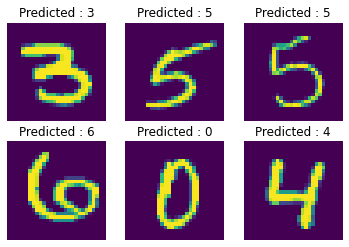

In [1]:
import csv
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt



class DigitDataset(Dataset):
    def __init__(self, x, y=None):
        super(DigitDataset).__init__()
        self.x = x
        self.y = y
    
    def __getitem__(self, idx):
        if self.y == None:
            return self.x[idx]
        return self.x[idx], self.y[idx]
    
    def __len__(self):
        return len(self.x)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        print(self)

        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784,256),
            nn.ReLU(),
            nn.Linear(256,100),
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self,x):
        x = self.model(x)
        x = torch.softmax(x, dim=-1)
        return x


### Prediction w/ mnist_net.pth
test_data_path = './mnist_test.csv'
saved_model_path = "./mnist_net.pth"
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'

df_test = pd.read_csv(test_data_path)

_xx = torch.Tensor(df_test.iloc[:,1:].values).reshape(len(df_test), 28, 28)
_xx = _xx.unsqueeze(1) # data strucurize to batch_size, depth, width, height
_yy = torch.Tensor(df_test.iloc[:,0].values).type(torch.long)

print(_xx.shape)
print(_yy.shape)

pretranind = torch.load(saved_model_path)
pretranind.eval()

l = len(df_test)
valid_x = _xx
valid_y = _yy
testset = DigitDataset(valid_x, valid_y)
test_dl = DataLoader(testset, batch_size = 250)
acc=0

for tx, ty in test_dl:
    tx = tx.to(device)
    ty = ty.to(device)

    ty_hat = pretranind(tx)
    test_pred = ty_hat.max(dim=1)[1]
    acc += (test_pred==ty).sum().item()

print(f"Test: Acc {100*acc/len(df_test)}")
test_x = _xx

outputs = pretranind(test_x)
_, pred = torch.max(outputs, 1)
pred = pred.cuda()

for i, img in enumerate(test_x[50:56]):
    plt.subplot(2, 3, i+1)
    plt.axis('off')
    plt.title(f"Predicted : {pred[50+i]}")
    plt.imshow(img.squeeze(0))



